In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] =(12,6)

In [23]:
data = pd.read_csv('Air_Traffic_Passenger_Statistics 2.csv')

In [24]:
data.head()

,Year,Adjusted Passenger Count,Passenger Count
0,2005,27271,27271
1,2005,29131,29131
2,2005,10830,5415
3,2005,35156,35156
4,2005,34090,34090


In [25]:
data.describe()

,Year,Adjusted Passenger Count,Passenger Count
count,15007.000000,15007.000000,15007.000000
mean,2010.385220,29331.917105,29240.521090
std,3.137589,58284.182219,58319.509284
min,2005.000000,1.000000,1.000000
25%,2008.000000,5495.500000,5373.500000
50%,2010.000000,9354.000000,9210.000000
75%,2013.000000,21182.000000,21158.500000
max,2016.000000,659837.000000,659837.000000


In [9]:
from sklearn.cluster import KMeans


In [72]:
kmeans = KMeans(n_clusters = 3)
data_filter = data.drop("Passenger Count",axis = 1 )
data_filter.describe()

,Year,Adjusted Passenger Count
count,15007.000000,15007.000000
mean,2010.385220,29331.917105
std,3.137589,58284.182219
min,2005.000000,1.000000
25%,2008.000000,5495.500000
50%,2010.000000,9354.000000
75%,2013.000000,21182.000000
max,2016.000000,659837.000000


In [73]:
kmeans.fit(data_filter)
kmeans.cluster_centers_

array([[  2010.31128166,  11886.19585572],
       [  2010.98349835, 352369.67656766],
       [  2010.85244922, 106654.08363202]])

In [74]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
15007


In [75]:
unique,count = np.unique(kmeans.labels_,return_counts = True)

In [76]:
print(dict(zip(unique,count)))

{0: 13029, 1: 303, 2: 1675}


In [77]:
data_filter['cluster']=kmeans.labels_

In [78]:
sns.set_style("whitegrid")

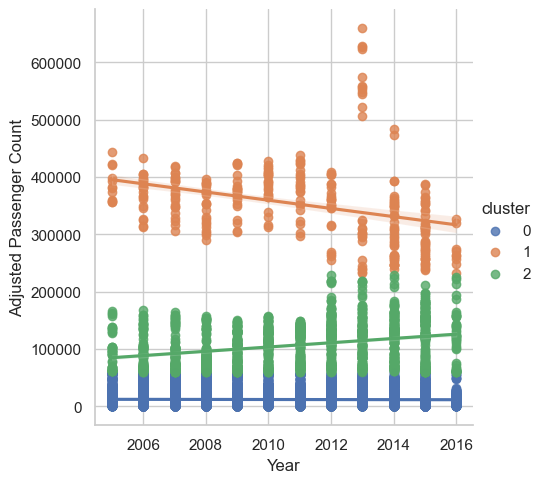

In [79]:
sns.lmplot(data = data_filter ,hue = 'cluster',x ='Year',y='Adjusted Passenger Count')